# Exploration of customer purchasing behavior

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.EDA_analysis import *
from scripts.logger import setup_logger

In [2]:
logger = setup_logger('eda_logger', '../logs/EDA.log')

In [3]:
data_train = pd.read_csv('../data/train_cleaned.csv',low_memory=False, index_col=False)
data_test=pd.read_csv('../data/test_cleaned.csv', low_memory=False, index_col=False)

In [4]:
logger.info('Training, test, and store data loaded.')

In [5]:
data_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [6]:
data_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854361,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352748,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


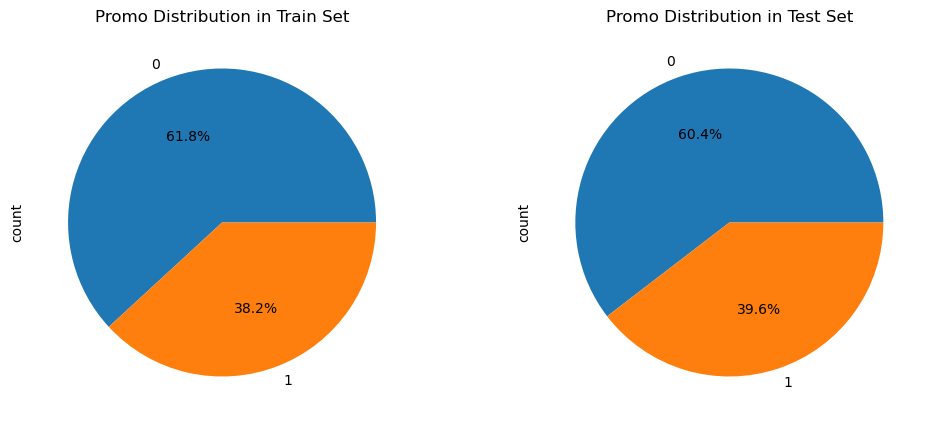

In [7]:
plot_promo_distribution(data_train, data_test)

In the training set, approximately 61.8% of the data falls under the "Promo" value of 0 (no promotion), while 38.2% falls under the "Promo" value of 1 (promotion).
In the test set, approximately 60.4% of the data is labeled as 0 (no promotion), and 39.6% is labeled as 1 (promotion).  

Conclusion:
The promotion distributions in both the training and test sets are quite similar, with only minor differences in the proportions. The training set has slightly more data points without promotion (61.8% vs. 60.4%) and slightly fewer with promotion (38.2% vs. 39.6%). These differences are minimal and suggest that the promotional data is distributed fairly consistently between the two sets, which is important for ensuring that any model trained on this data will generalize well across both sets.

### Check & compare sales behavior before, during, and after holidays

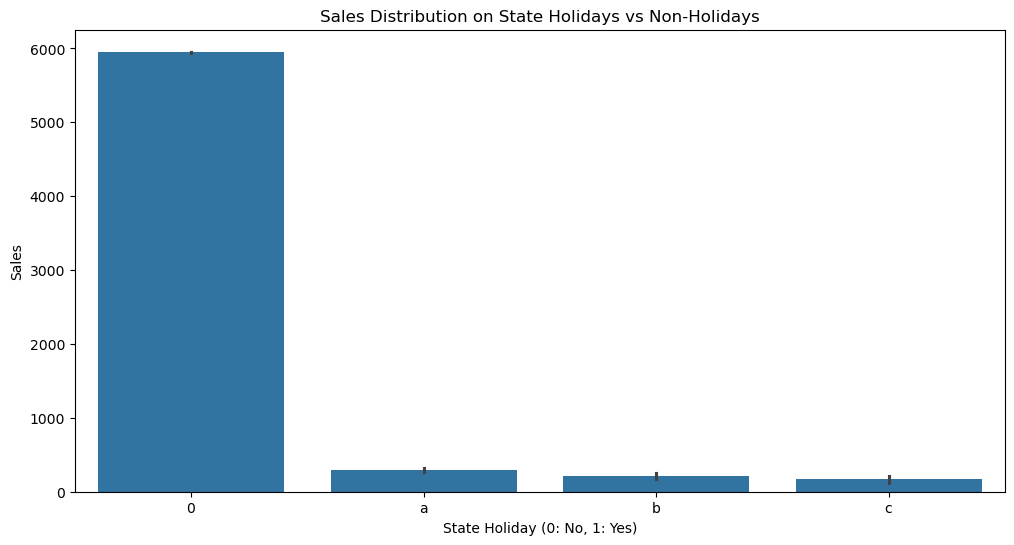

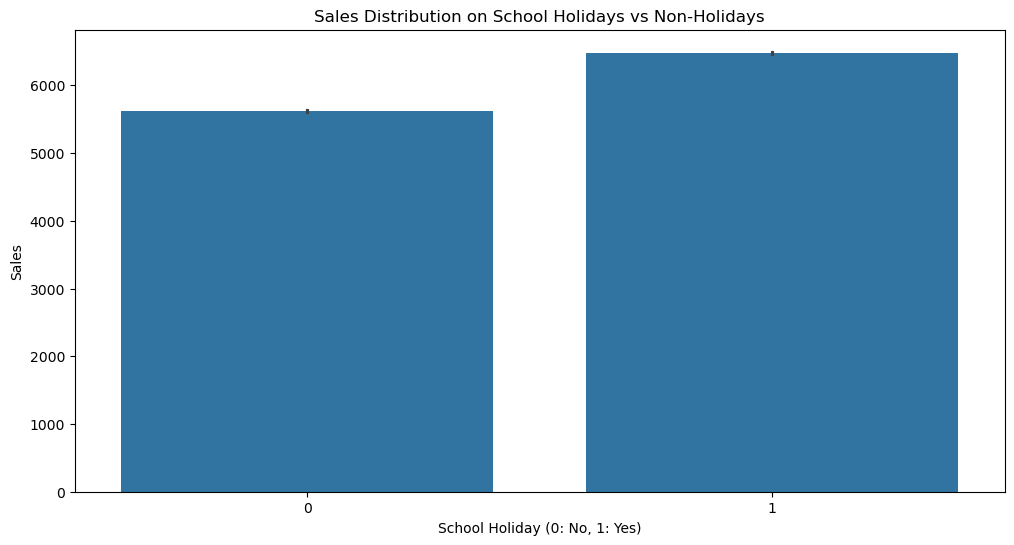

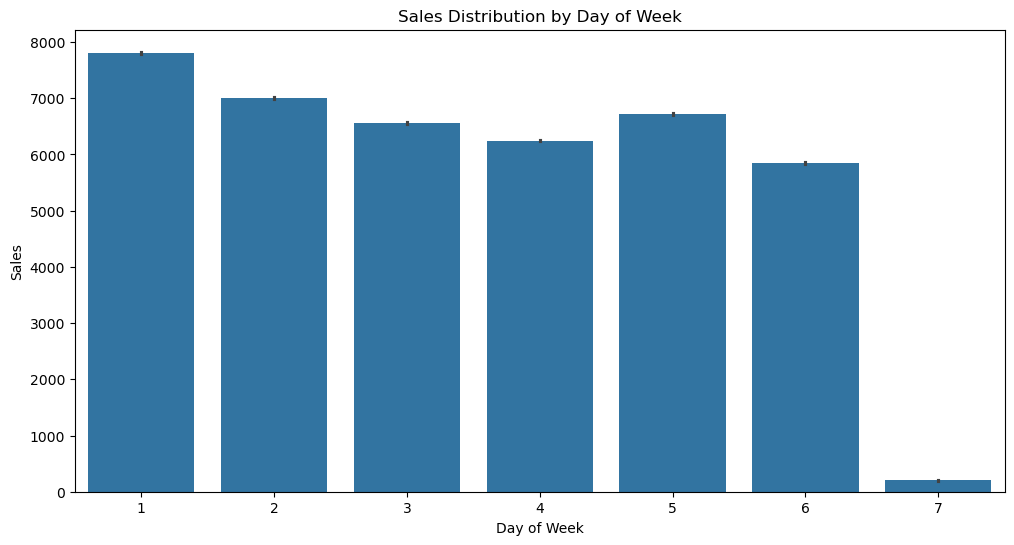

In [8]:
analyze_holiday_sales(data_train)

State Holidays:
Sales are significantly higher on non-state holidays compared to state holidays. This suggests that most stores are likely closed or see reduced customer traffic during state holidays.  

School Holidays:
Sales are relatively consistent regardless of school holidays, indicating that school closures do not significantly impact overall sales.  

Day of the Week:
Sales peak at the beginning of the week (Monday) and gradually decrease towards the weekend, with a noticeable drop on Sundays. This pattern may reflect typical shopping behavior, where customers prefer shopping earlier in the week.    

### Find out any seasonal (Christmas, Easter, etc) purchase behaviors

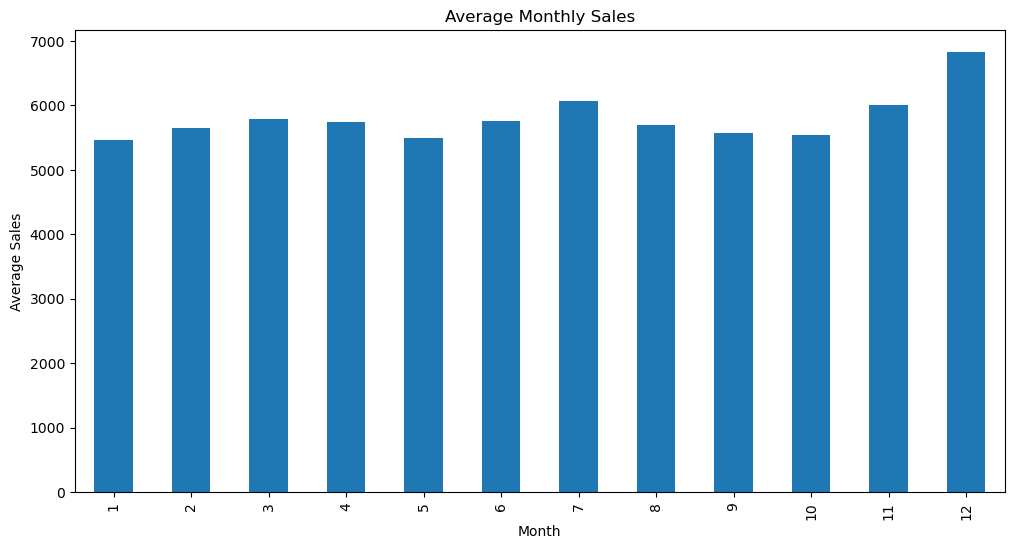

In [9]:
analyze_seasonal_sales(data_train)

December Surge:
There is a noticeable increase in sales during December, likely due to the Christmas season. This suggests a seasonal boost in consumer spending during this period.

Consistent Sales:
Sales remain relatively stable throughout the other months, with no dramatic peaks or troughs, indicating consistent purchasing behavior outside of major holiday seasons.

Mid-Year Activity:
There is a slight increase in sales around July, which might be attributed to summer promotions or other seasonal events.
These insights can help Rossmann Pharmaceuticals plan inventory and marketing strategies to capitalize on increased demand during the holiday season, particularly in December.

### What can you say about the correlation between sales and the number of customers?

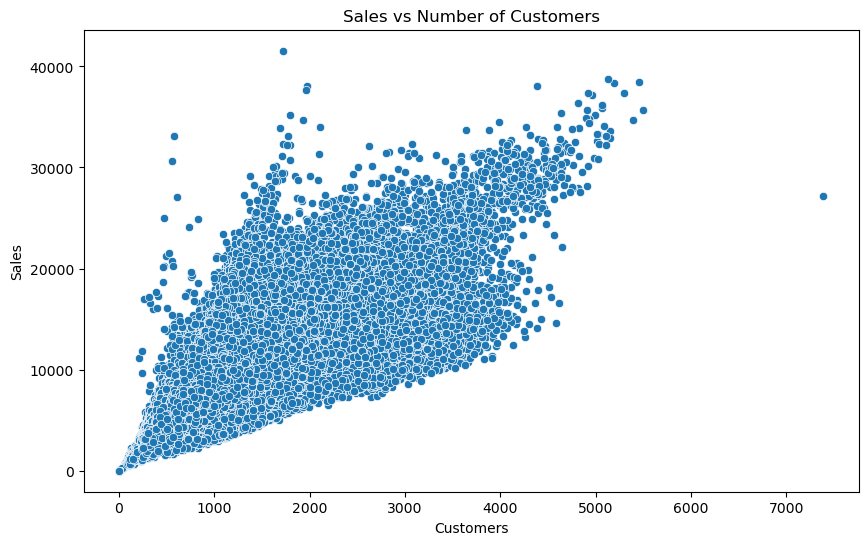

Correlation between Sales and Customers: 0.894710773301837


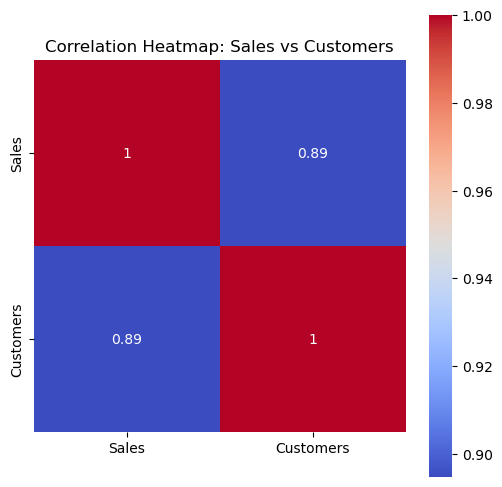

In [10]:
analyze_sales_customers_correlation(data_train)
logger.info("correlation between sales and number of customers")

High Correlation:
The scatter plot shows a clear positive relationship between the number of customers and sales, indicating that more customers generally lead to higher sales.

Correlation Coefficient:
The correlation coefficient is approximately 0.89, suggesting a very strong positive correlation. This means that changes in the number of customers are closely associated with changes in sales.

Consistent Pattern:
The consistent upward trend in the scatter plot further supports the strong relationship between these two variables.
These insights highlight the importance of customer footfall in driving sales, suggesting that strategies to increase customer visits could be effective in boosting sales.

### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

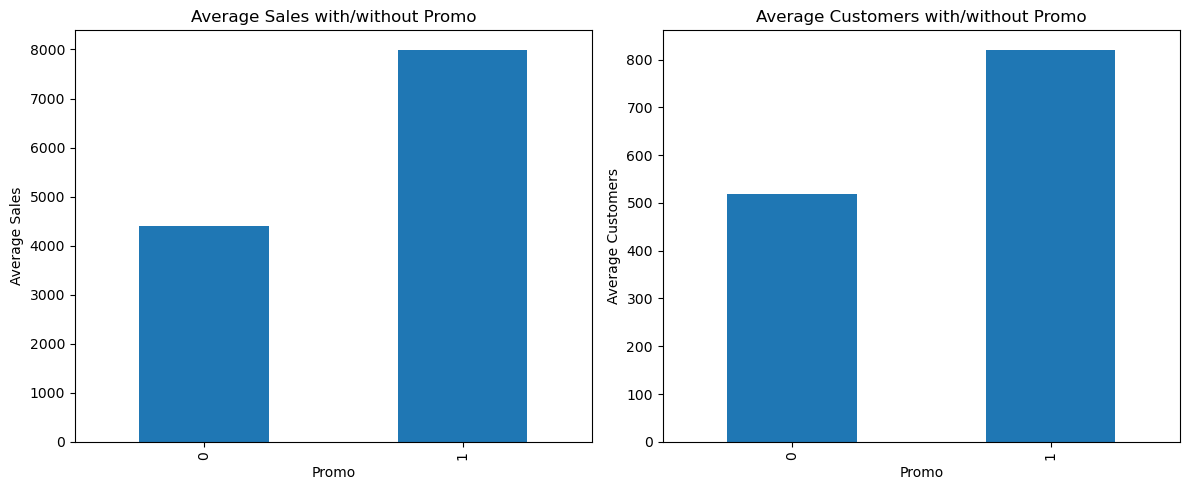

In [11]:
analyze_promo_effect(data_train)

Effect on Sales:
Promotions significantly increase average sales. Stores with promotions see much higher sales compared to those without.

Attracting Customers:
Promotions also attract more customers. The average number of customers is higher when promotions are active.

Impact on Existing Customers:
The increase in both sales and customer numbers suggests that promotions are effective in bringing in additional customers, potentially increasing the purchasing frequency of existing ones as well.
Overall, promotions appear to be a successful strategy for boosting both customer footfall and sales.

### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

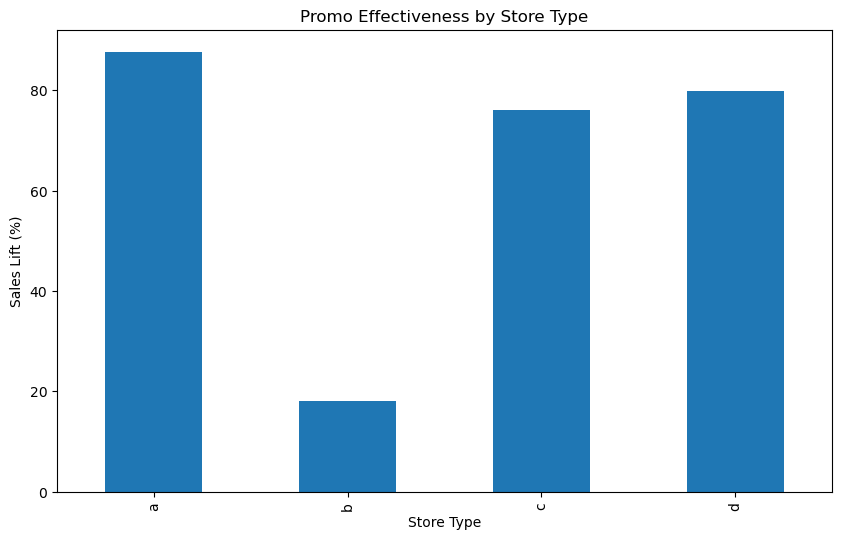

Top 10 stores where promos are most effective:
Store
198     2.258195
607     1.889831
543     1.759064
575     1.737234
271     1.620440
693     1.611931
96      1.575477
1108    1.567058
552     1.562815
635     1.559672
dtype: float64


In [12]:
enhance_promo_analysis(data_train)

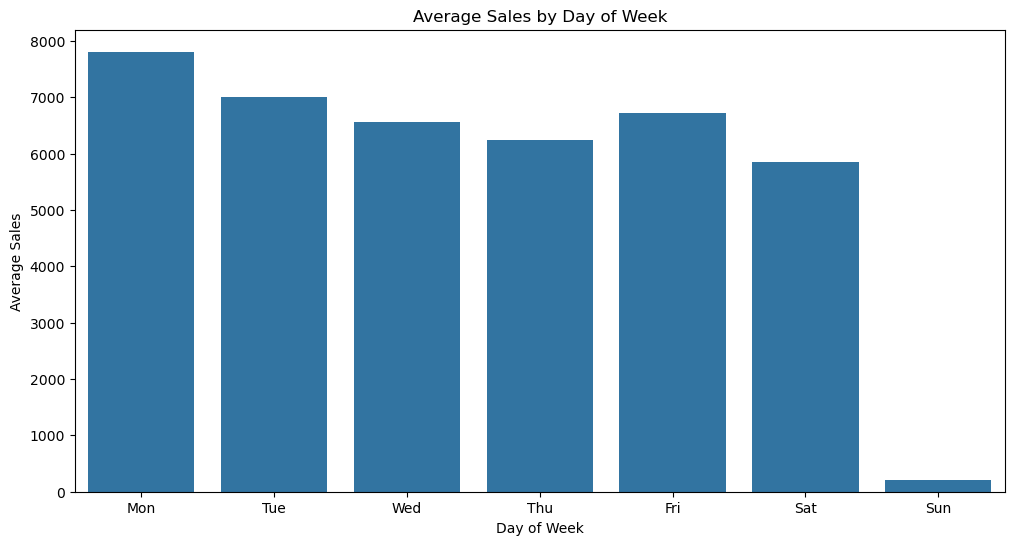

Proportion of stores open by day of week:
DayOfWeek
1    0.950459
2    0.988309
3    0.974400
4    0.923199
5    0.950598
6    0.995357
7    0.024826
Name: Open, dtype: float64

Average sales for open stores by day of week:
DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64


In [13]:
analyze_store_hours(data_train)

Targeted Day and Store Type Strategy:
Promotions are most effective in store types a, c, and d, with significant sales lifts. To maximize impact, focus promos on these store types, especially on days with lower sales, like mid-week and weekends.
Adjusting promotional strategies to target underperforming days can help boost customer engagement and balance sales throughout the week.
These insights suggest a combined approach of targeting both specific store types and days to optimize promotional effectiveness.

### Trends of customer behavior during store opening and closing times

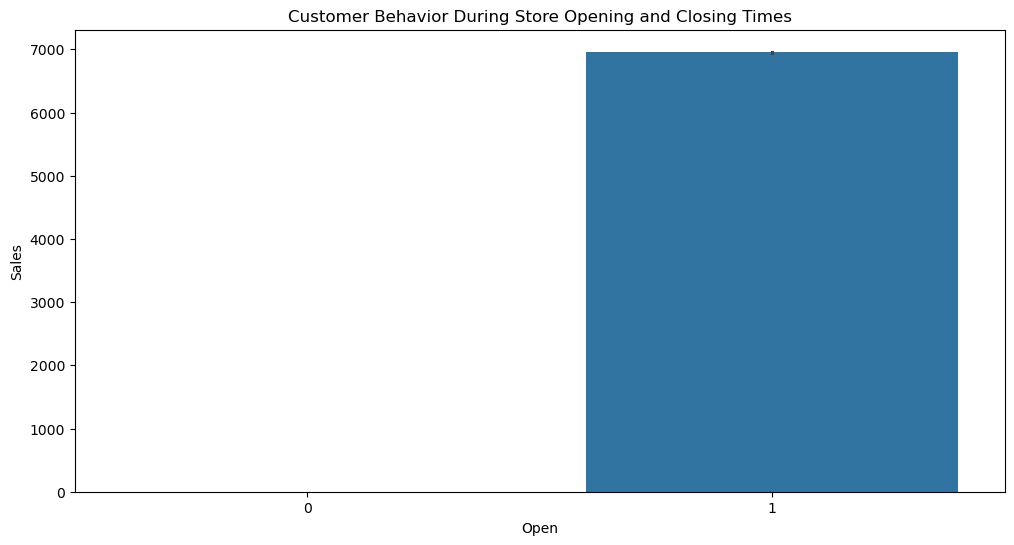

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Open', y='Sales', data=data_train)
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()

Sales During Open Times:
Sales occur exclusively when stores are open, as expected. No sales are recorded during closed times.

Customer Dependence:
Store operations directly influence customer transactions, highlighting the importance of consistent opening hours to maintain sales levels.
These insights emphasize the critical role of store hours in driving sales and ensuring customer access to products.

### Which stores are open on all weekdays? How does that affect their sales on weekends?

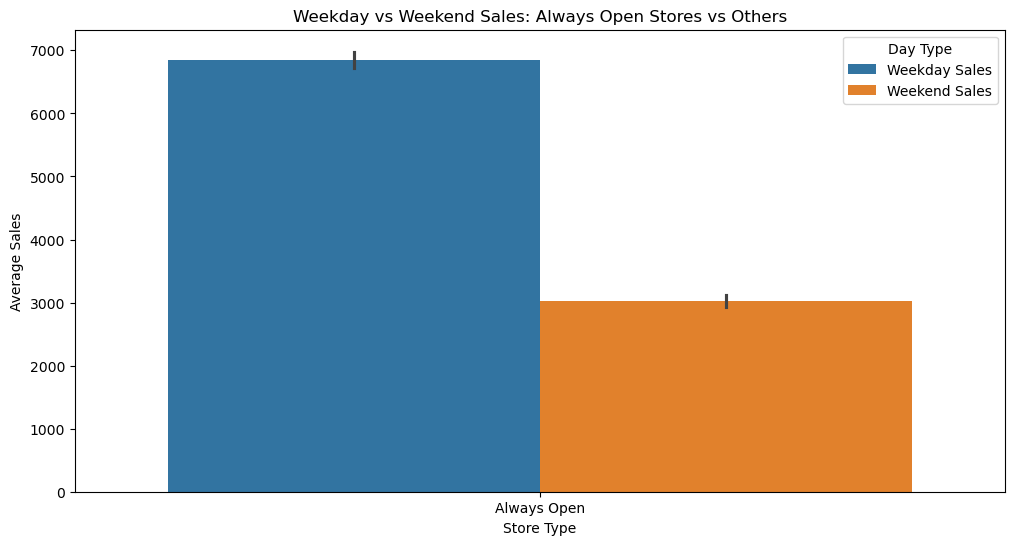

Summary Statistics:
            Weekday Sales              Weekend Sales             
                     mean       median          mean       median
Store Type                                                       
Always Open   6850.073688  6530.900593   3031.040139  2778.347015


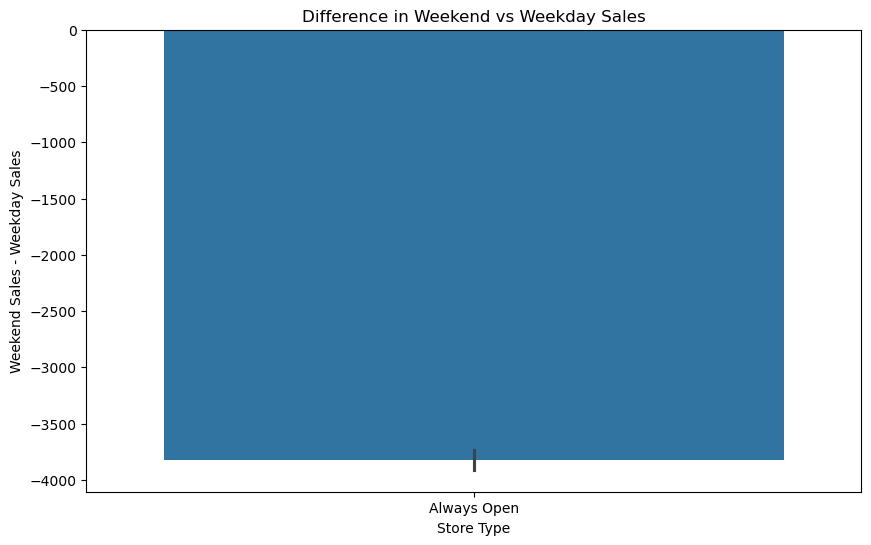


Average difference in Weekend vs Weekday sales:
Store Type
Always Open   -3819.033549
Name: Weekend_Weekday_Diff, dtype: float64


In [15]:
analyze_weekday_open_stores(data_train)

Weekday vs. Weekend Sales:
Stores open on all weekdays have higher average sales during weekdays compared to weekends.
There is a significant drop in sales on weekends for these stores.

Sales Impact:
The difference between weekday and weekend sales suggests that consistent weekday operations do not necessarily boost weekend sales.

Operational Strategy:
Focusing promotions or special events on weekends could help increase weekend sales for stores consistently open during the week.
These insights can help tailor strategies to balance sales throughout the week.

### Check how the assortment type affects sales

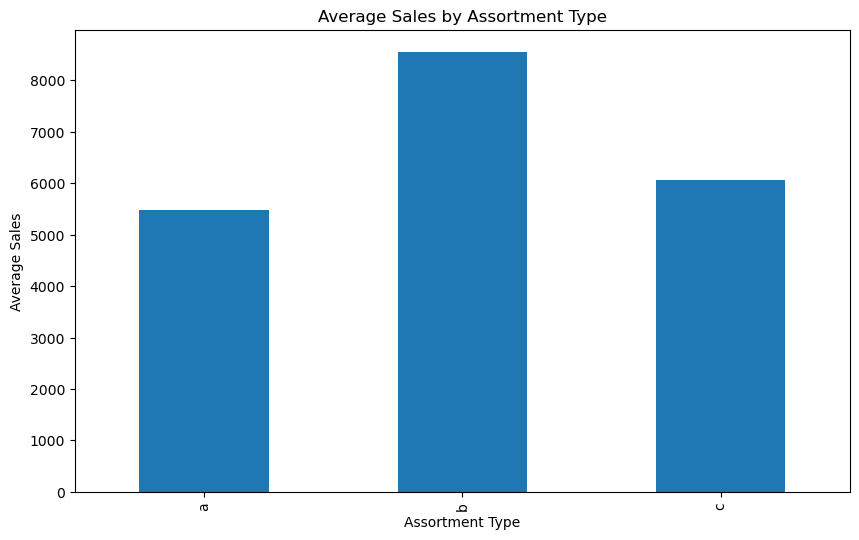

In [16]:
analyze_assortment_effect(data_train)

Sales Performance:
Stores with assortment type b have the highest average sales.
Types a and c have lower average sales compared to type b.

Assortment Strategy:
Offering a more varied assortment (type b) likely attracts more customers and increases sales.

Optimization Potential:
Consider expanding assortment types a and c to include more diverse products to potentially boost sales.
These insights suggest that a broader product range can positively impact sales performance.

### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

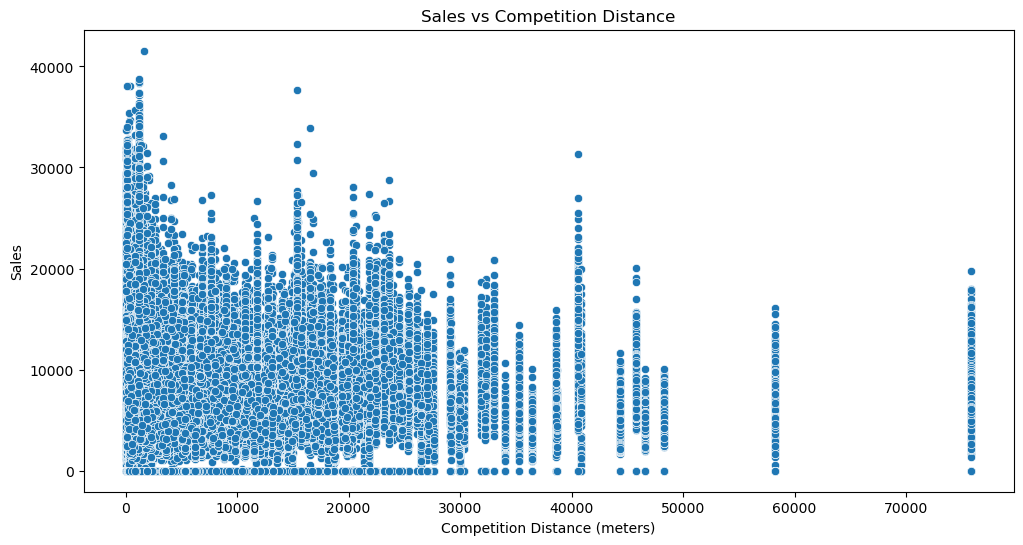

Sales vs Competition Distance (Correlation: -0.02)


In [17]:
analyze_competition_distance(data_train)

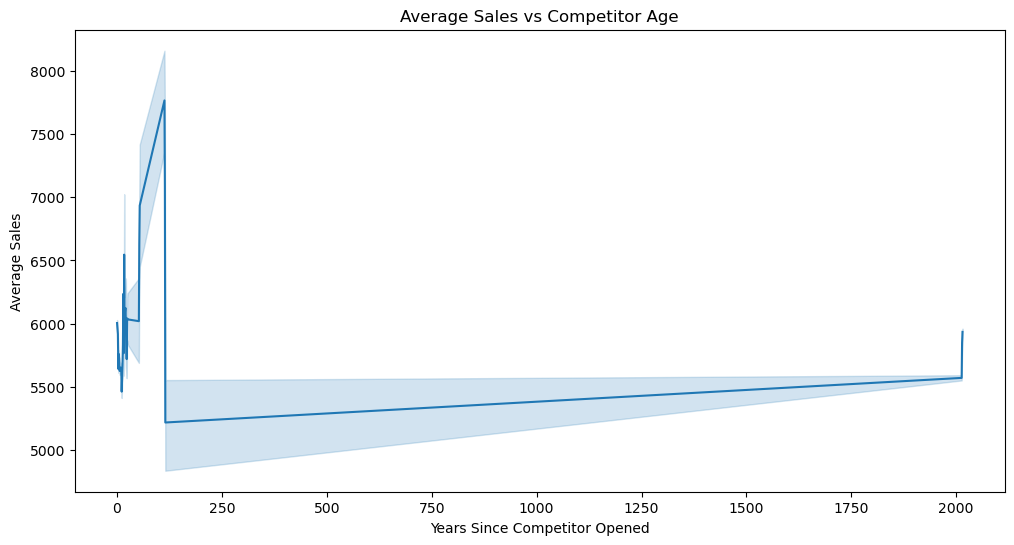

In [18]:
analyze_new_competitors(data_train)

Distance to Competitor:
The scatter plot of sales versus competition distance shows a very weak correlation (-0.02). This implies that the distance to the nearest competitor does not significantly affect sales. Sales seem to be relatively consistent regardless of how far away the nearest competitor is.

Competitor Location in City Centers:
If stores and their competitors are all located in city centers, the distance might matter even less. City centers tend to have high foot traffic and a dense customer base, which can diminish the impact of proximity to competitors. Customers in these areas might prioritize convenience or specific store preferences over distance.

Competitor Age:
The plot of average sales versus competitor age shows that sales tend to stabilize after the initial entry of a competitor. There is a slight increase over time, possibly due to market adaptation or loyalty development.
Overall, while competitor proximity and age have some impact on sales, their effects are relatively minor, especially in densely populated urban areas.

### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

Total stores affected by new competitor opening: 0


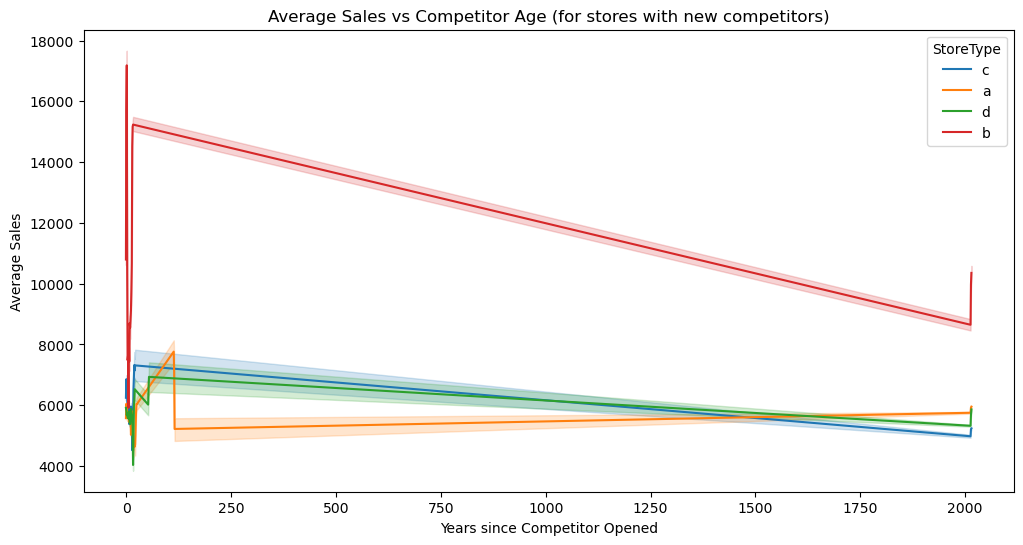

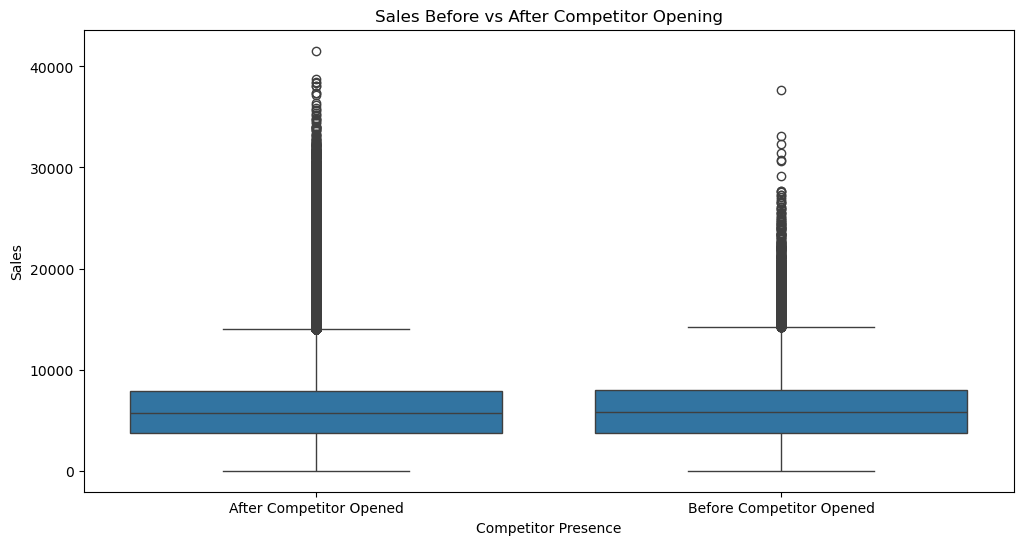

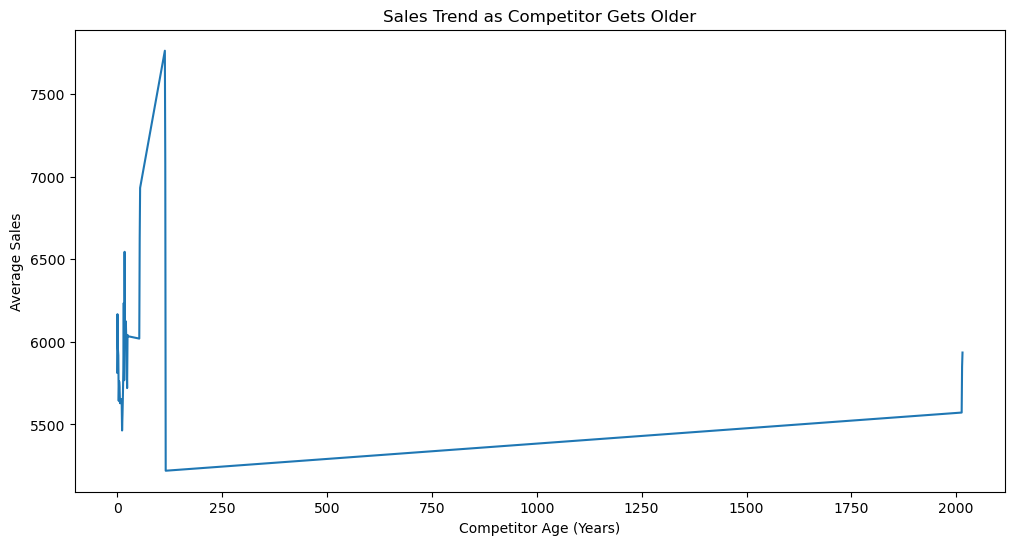

Correlation between Competition Distance and Sales: -0.02


In [19]:
analyze_competitor_effect(data_train)

Opening of New Competitors:
The data shows no stores were affected by new competitor openings, as indicated by the "Total stores affected by new competitor opening: 0." This suggests that the data may not have captured any significant events where competitors opened nearby.

Sales Before vs. After Competitor Opening:
The box plot indicates little difference in sales before and after competitors opened. This suggests that the presence of competitors might not have had a substantial immediate impact on sales.

Sales Trend Over Time:
As competitors age, the average sales show a slight decreasing trend initially, but it stabilizes over time. This indicates that any initial impact from competitors might diminish as stores adapt.

Correlation Between Competition Distance and Sales:
With a correlation of -0.02, there is a negligible relationship between competition distance and sales. This suggests that proximity to competitors does not heavily influence sales performance.
Overall, the analysis implies that while new competitors might have some initial impact, over time, stores seem to adapt, and the effect diminishes. The negligible correlation with distance further suggests that other factors may play a more significant role in affecting sales.